Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cd=pd.read_csv('/users/rahulkp/downloads/crime_data.csv')
cd

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
cd=cd.drop('Unnamed: 0',axis=1)
cd

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [4]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [5]:
cd.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [7]:
cd.values

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [8]:
array=cd.values

In [9]:
from sklearn.preprocessing import StandardScaler
stscaler=StandardScaler().fit(array)
X=stscaler.transform(array)
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

# Hierarchical Clustering

Text(0.5, 1.0, 'dendrogram')

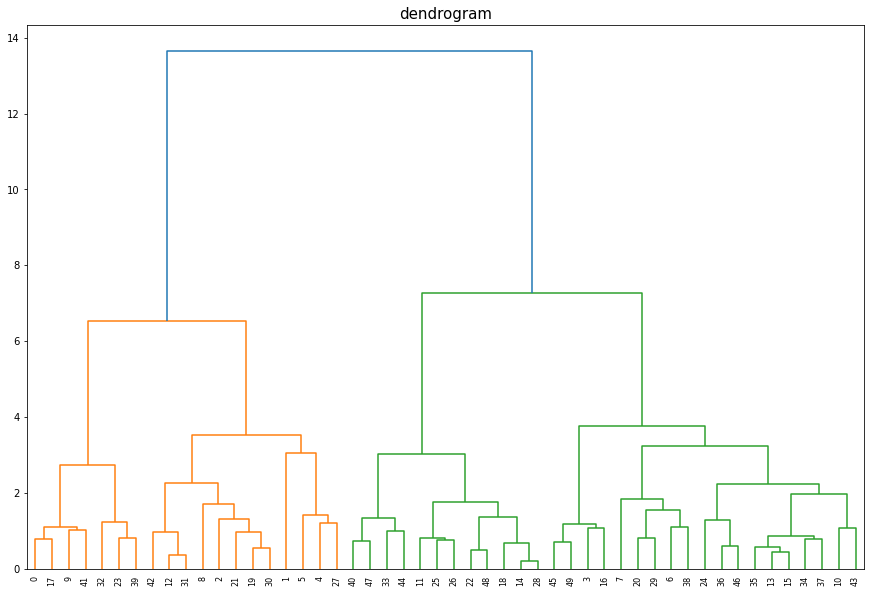

In [16]:
# create dendrogram
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
fig=plt.figure(figsize=(15,10))
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('dendrogram',size=15)

In [20]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='complete').fit(X)

In [21]:
hcl=hc.fit_predict(X)
hcl

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

In [22]:
from sklearn import metrics
S1=metrics.silhouette_score(X,hcl)
S1

0.4047944502519567

from hierarchical clustering we got a silhouette score of 0.4047

# K-Means Clustering

[200.0, 104.96163315756871, 80.0888613219962, 57.55425863091104, 50.52026552535068, 43.927464044975736, 40.52183461131976, 34.68738839784909, 32.70648136388185, 28.311639397122555]


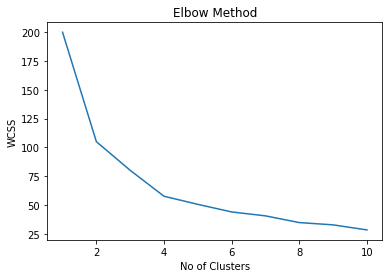

In [23]:
from sklearn.cluster import KMeans
#WCSS (Within Cluster Sum of Squares)
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
print(wcss)

plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
kmn=KMeans(n_clusters=2)
y_km=kmn.fit_predict(X)

In [25]:
y_km

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

In [28]:
kmn.cluster_centers_

array([[ 1.01513667,  1.02412028,  0.19959126,  0.85556386],
       [-0.67675778, -0.68274685, -0.13306084, -0.57037591]])

In [31]:
S2=metrics.silhouette_score(X,y_km)
S2

0.4084890326217641

from K-Means clustering we got a silhouette score of 0.4084

# DB Scan Clustering

In [43]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.9,min_samples=4)
dbscan.fit(X)

DBSCAN(eps=0.9, min_samples=4)

In [44]:
#Noisy samples are given the label -1.
dbscan.labels_

array([-1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1,  0, -1, -1, -1,  0, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1,  0,
        0,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0])

In [45]:
c1=pd.DataFrame(dbscan.labels_,columns=['cluster'])
c1

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,0
7,-1
8,-1
9,-1


In [46]:
df=pd.concat([cd,c1],axis=1)
df

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


In [47]:
df['cluster'].value_counts()

-1    30
 0    20
Name: cluster, dtype: int64

In [48]:
S3=metrics.silhouette_score(X,dbscan.labels_)
S3

0.266781916070482

In [49]:
s_df=pd.DataFrame({'Clustering Type':['Hierarchical','K-Means','DB Scan'],'Silhouette_score':[S1,S2,S3]})
s_df

,Clustering Type,Silhouette_score
0,Hierarchical,0.404794
1,K-Means,0.408489
2,DB Scan,0.266782


For The given crime dataset,

we have found that the among the 3 clustering method , K-Means Clustering is the best suited one for this dataset, As its having a high Silhouette Score when compared with other two